# 손실함수 (Loss Function)

## 이진분류 손실함수 Binary Cross Entropy

$$
\text{Loss} = -\left[y \cdot \log(p) + (1 - y) \cdot \log(1 - p)\right]
$$
- $y$: 실제 값 (0 또는 1)
- $p$: 예측 확률 (0과 1 사이)


- 정답과 예측이 차이가 크면 손실함수의 결과도 커야한다.
- 차이가 작으면 손실함수의 결과도 작게 만들어주는 것!
→ log

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [5]:
# 이진 분류 모델 예시, 정답이 1

# 정답이 1일때 -log(p)
# - 예측 0.2 : -log(0.2) = 0.693, 손실이 크게 나와야한다.
# - 예측 0.7 : -log(0.7) = 0.356, 손실이 작게 나오게 된다.
print('정답이 1, 손실이 큰 경우 : ', -np.log(0.2))
print('정답이 1, 손실이 작은 경우 : ', -np.log(0.7))

# 정답이 0일때 -log(1-p)
# - 예측 0.2 : -log(1-0.2) = 0.693, 손실이 크게 나와야한다.
# - 예측 0.7 : -log(1-0.7) = 0.356, 손실이 작게 나오게 된다.
print('정답이 0, 손실이 큰 경우 : ', -np.log(1-0.2))
print('정답이 0, 손실이 작은 경우 : ', -np.log(1-0.7))

정답이 1, 손실이 큰 경우 :  1.6094379124341003
정답이 1, 손실이 작은 경우 :  0.35667494393873245
정답이 0, 손실이 큰 경우 :  0.2231435513142097
정답이 0, 손실이 작은 경우 :  1.203972804325936


In [7]:
# 직접 구현
def binary_cross_entropy(y_true, y_pred):
    epsilon = 1e-8    # 0.00000001
    return -np.mean(y_true * np.log(y_pred + epsilon) + (1 - y_true) * np.log(1 - y_pred + epsilon))

# 위 노드를 파악해서 손실함수를 구현해보자.

y_true = np.array([1, 0, 1, 1])
y_pred = np.array([0.9, 0.1, 0.8, 0.7])

loss = binary_cross_entropy(y_true, y_pred)
loss

np.float64(0.19763486939016456)

In [13]:
y_true = torch.tensor([1, 0, 1, 1], dtype=torch.float32)
y_pred = torch.tensor([0.9, 0.1, 0.8, 0.7], dtype=torch.float32)

criterion = nn.BCELoss()
loss = criterion(y_pred, y_true) # 손실함수 계산, 예측값과 정답값을 넣어준다. 순서 중요!
loss

tensor(0.1976)

In [21]:
# torch 손실함수 BCEWithLogitsLoss
# - 입력: logits (예측값)
logits = torch.tensor([2.173, -2.345, 1.386, -0.405], dtype=torch.float32)    # 출력층 선형방정식 결과값
y_true = torch.tensor([1, 0, 1, 1], dtype=torch.float32)

# sigmoid + BCELoss 와 동일한 결과
p = torch.sigmoid(logits)
criterion = nn.BCELoss()
loss = criterion(p, y_true)
print('sigmoid + BCELoss : ', loss)

# BCEWithLogitsLoss
criterion2 = nn.BCEWithLogitsLoss()
loss2 = criterion2(logits, y_true)
print('BCEWithLogitsLoss : ', loss2)

sigmoid + BCELoss :  tensor(0.3346)
BCEWithLogitsLoss :  tensor(0.3346)


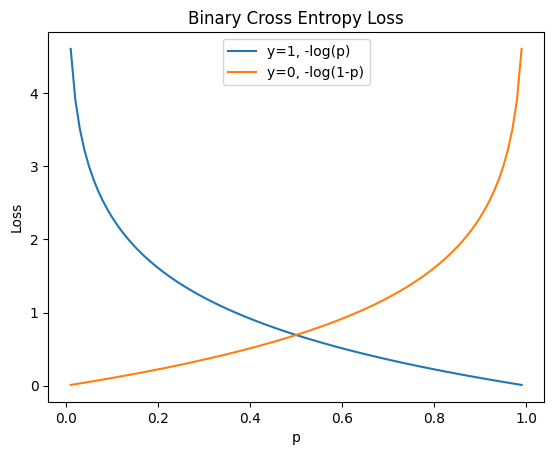

In [25]:
# 손실함수 시각화
p = np.linspace(0.01, 0.99, 100)    # 시그모이드 통과한 확률값

loss_1 = -np.log(p)
loss_0 = -np.log(1-p)

plt.plot(p, loss_1, label='y=1, -log(p)')
plt.plot(p, loss_0, label='y=0, -log(1-p)')

plt.title('Binary Cross Entropy Loss')
plt.xlabel('p')
plt.ylabel('Loss')
plt.legend()
plt.show()

## 다중분류 손실함수 Cross Entropy
모델이 출력한 점수(logits)를 softmax 함수로 확률로 바꾼 뒤, 정답 클래스의 log 확률을 취한 값을 손실로 계산한다.

$$
\text{Loss} = -\log(\text{softmax}(\text{logits})[y])
$$

**수식 전체**

$$
\text{Loss} = -\log\left( \frac{e^{z_y}}{\sum_{j} e^{z_j}} \right)
$$

* $z = [z_0, z_1, ..., z_k]$: 각 클래스에 대한 모델의 출력값 (logits)
* $z_y$: 정답 클래스 $y$에 해당하는 로짓 값
* $\sum_j e^{z_j}$: 모든 클래스에 대한 softmax 분모

In [30]:
# 직접 구현
y_true = 0 # 0번 클래스 정답
z = torch.tensor([2.0, 1.0, 0.1], dtype=torch.float32)
p = F.softmax(z, dim=0)
print('p : ', p)

pred = p.argmax(dim=0)
print('pred : ', pred)

loss = -np.log(p.numpy()[y_true])
print('loss : ', loss)

loss = -torch.log(p[y_true])
print('loss : ', loss)

p :  tensor([0.6590, 0.2424, 0.0986])
pred :  tensor(0)
loss :  0.41702995
loss :  tensor(0.4170)


In [34]:
# torch의 CrossEntropyLoss
y_true = torch.tensor([0], dtype=torch.long)    # long 타입만 허용!
z = torch.tensor([[2.0, 1.0, 0.1]], dtype=torch.float32)

criterion = nn.CrossEntropyLoss()
loss = criterion(z, y_true)
loss

tensor(0.4170)

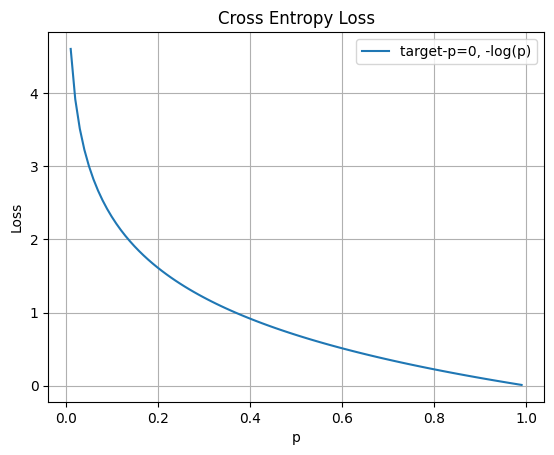

In [35]:
# 시각화
p = np.linspace(0.01, 0.99, 100)
loss = -np.log(p)

plt.plot(p, loss, label='target-p=0, -log(p)')
plt.title('Cross Entropy Loss')
plt.xlabel('p')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()


## 회귀 손실함수

**1. MSELoss (Mean Squared Error Loss)**

**정의**: 오차(예측 - 실제)의 **제곱** 평균값을 계산

**특징**: 큰 오차에 더 큰 패널티 → 이상치에 민감

**수식**

$$
\text{MSELoss} = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2
$$

**2. L1Loss 또는 MAELoss (Mean Absolute Error Loss)**

**정의**: 오차(예측 - 실제)의 **절댓값** 평균

**특징**: 이상치에 덜 민감하지만, 미분 불연속점 존재

**수식**

$$
\text{MAELoss} = \frac{1}{n} \sum_{i=1}^{n} \left| y_i - \hat{y}_i \right|
$$

**3. HuberLoss (Smooth L1 Loss)**

**정의**: 작은 오차에는 MSE처럼, 큰 오차에는 MAE처럼 동작

**특징**: 이상치에 덜 민감하면서도 미분 가능 → **타협형 손실함수**

**수식** (임계값 $\delta$를 기준으로 나뉨)

$$
\text{HuberLoss}(y_i, \hat{y}_i) =
\begin{cases}
\frac{1}{2}(y_i - \hat{y}_i)^2 & \text{if } |y_i - \hat{y}_i| \leq \delta \\
\delta \cdot \left( |y_i - \hat{y}_i| - \frac{1}{2}\delta \right) & \text{otherwise}
\end{cases}
$$

error :  [ 0.5 -0.5 -0.1 -0.8]


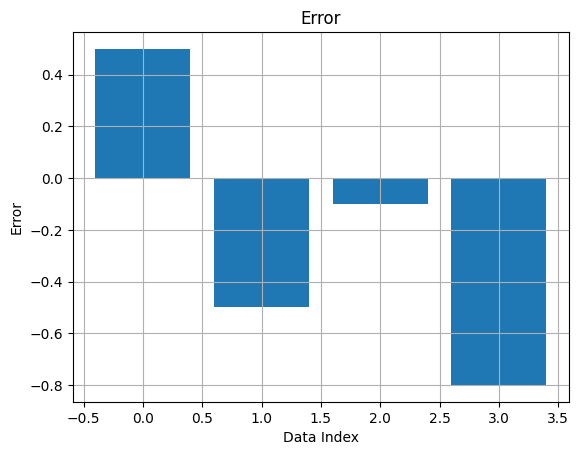

In [38]:
# 이상치가 없는 경우
y_true = np.array([3.0, -0.5, 2.0, 7.0])
y_pred = np.array([2.5, 0.0, 2.1, 7.8])

error = y_true - y_pred
print('error : ', error)

plt.bar(range(len(error)), error)
plt.title('Error')
plt.xlabel('Data Index')
plt.ylabel('Error')
plt.grid()
plt.show()

error :  [ 0.5 -0.5 -0.1 -0.8 35.5 50. ]


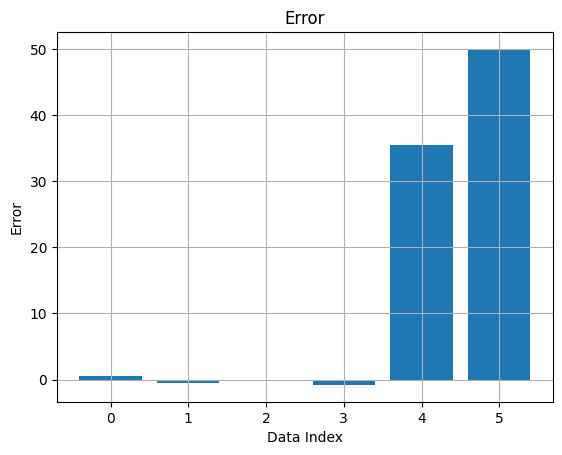

In [39]:
# 이상치가 있는 경우
y_true = np.array([3.0, -0.5, 2.0, 7.0, 50.5, 60.0])
y_pred = np.array([2.5, 0.0, 2.1, 7.8, 15.0, 10.0])

error = y_true - y_pred
print('error : ', error)

plt.bar(range(len(error)), error)
plt.title('Error')
plt.xlabel('Data Index')
plt.ylabel('Error')
plt.grid()
plt.show()

In [ ]:
# 손실함수별 비교
# 1. MSELoss
def mse(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

# 2. MAELoss
def mae(y_true, y_pred):
    return np.mean(np.abs(y_true - y_pred))

# 3. HuberLoss
def huber(y_true, y_pred, delta=1.0):
    """
    Huber Loss 계산
    delta : 임계값
    delta 이하 : MSE
    delta 초과 : MAE
    
    return np.mean(np.where(np.abs(y_true - y_pred) <= delta, 
                            (y_true - y_pred) ** 2 / 2, 
                            delta * (np.abs(y_true - y_pred) - delta / 2)))
    """
    error = y_true - y_pred
    is_small_error = error <= delta
    return np.mean(np.where(is_small_error,
                    0.5 * error ** 2,
                    delta * (np.abs(error) - 0.5 * delta)))


# 이상치가 있는 경우우
y_true = np.array([3.0, -0.5, 2.0, 7.0, 50.5, 60.0])
y_pred = np.array([2.5, 0.0, 2.1, 7.8, 15.0, 7.7])

mse_loss = mse(y_true, y_pred)
mae_loss = mae(y_true, y_pred)
huber_loss = huber(y_true, y_pred)

print('이상치가 있는 경우')
print('MSELoss : ', mse_loss)
print('MAELoss : ', mae_loss)
print('HuberLoss : ', huber_loss)

# 이상치가 없는 경우
y_true = np.array([3.0, -0.5, 2.0, 7.0])
y_pred = np.array([2.5, 0.0, 2.1, 7.8])

mse_loss = mse(y_true, y_pred)
mae_loss = mae(y_true, y_pred)
huber_loss = huber(y_true, y_pred)

print('이상치가 없는 경우')
print('MSELoss : ', mse_loss)
print('MAELoss : ', mae_loss)
print('HuberLoss : ', huber_loss)

이상치가 있는 경우
MSELoss :  666.1149999999999
MAELoss :  14.949999999999998
HuberLoss :  14.5625
이상치가 없는 경우
MSELoss :  0.2874999999999999
MAELoss :  0.475
HuberLoss :  0.14374999999999996


In [51]:
# torch 손실함수
# 1. MSELoss
y_true = torch.tensor([3.0, -0.5, 2.0, 7.0, 50.5, 60.0], dtype=torch.float32)
y_pred = torch.tensor([2.5, 0.0, 2.1, 7.8, 15.0, 7.7], dtype=torch.float32)

print('MSELoss(객체)      : ', nn.MSELoss()(y_pred, y_true))
print('MSELoss(함수)      : ', F.mse_loss(y_pred, y_true))
   
# 2. MAELoss   
print('MAELoss(객체)      : ', nn.L1Loss()(y_pred, y_true))
print('MAELoss(함수)      : ', F.l1_loss(y_pred, y_true))

# 3. HuberLoss
print('HuberLoss(객체)    : ', nn.HuberLoss()(y_pred, y_true))
print('SmoothL1Loss(함수) : ', F.smooth_l1_loss(y_pred, y_true))


MSELoss(객체)      :  tensor(666.1150)
MSELoss(함수)      :  tensor(666.1150)
MAELoss(객체)      :  tensor(14.9500)
MAELoss(함수)      :  tensor(14.9500)
HuberLoss(객체)    :  tensor(14.5625)
SmoothL1Loss(함수) :  tensor(14.5625)


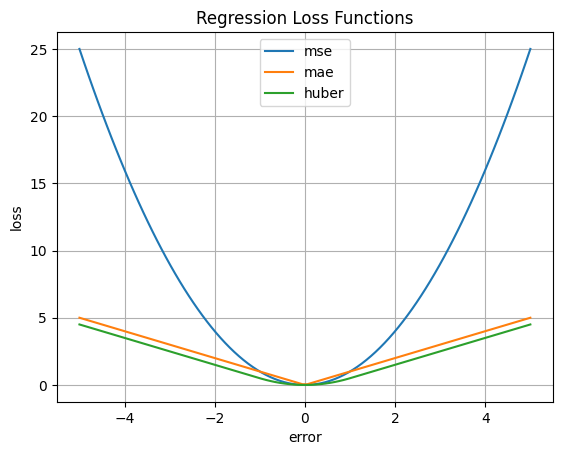

In [59]:
# 시각화
errors = torch.linspace(-5, 5, 100)

# 손실함수 객체
mse_fn = nn.MSELoss(reduction='none')      # reduction=mean : 여러 오차를 평균내어 스칼라 반환
mae_fn = nn.L1Loss(reduction='none')       # reduction=sum  : 모든 오차를 더해 스칼라 반환
huber_fn = nn.HuberLoss(reduction='none')  # reduction=none : 모든 오차를 그대로 반환


# 정답 /예측
y_true = torch.zeros_like(errors)
y_pred = errors

# 손실 계산, torch 손실함수는 모두 벡터화 연산 지원, 모든 예측값에 대해 손실 계산, 벡터화 연산 속도 빠름, pred를 먼저 넣어줘야함
mse_loss = mse_fn(y_pred, y_true).numpy()
mae_loss = mae_fn(y_pred, y_true).numpy()
huber_loss = huber_fn(y_pred, y_true).numpy()
errors = errors.numpy()

# 시각화
plt.plot(errors, mse_loss, label='mse')
plt.plot(errors, mae_loss, label='mae')
plt.plot(errors, huber_loss, label='huber')

plt.title('Regression Loss Functions')
plt.legend()
plt.xlabel('error')
plt.ylabel('loss')
plt.legend()
plt.grid()
plt.show()

### 신경망 모델에서 손실 함수 사용


In [64]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 데이터 생성
X, y = make_classification(
    n_samples=1000,
    n_features=20,
    n_classes=2,
    n_informative=15,
    n_redundant=5,
    random_state=42
)

# 전처리
scaler = StandardScaler()
X = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

def one_hot(labels, num_classes):
    return np.eye(num_classes)[labels]

y_train_oh = one_hot(y_train, 2)
y_test_oh = one_hot(y_test, 2)

In [65]:
X_train.shape

(750, 20)

In [109]:
# 모델 파라미터 초기화
np.random.seed(42)

input_dim = X_train.shape[1] # 20, feature 개수, input_dim은 feature 개수와 같아야함
hidden_dim = 32              # 은닉층 노드 개수
output_dim = 2               # 출력층 노드 개수

W1 = np.random.randn(input_dim, hidden_dim)
b1 = np.zeros((1, hidden_dim))
W2 = np.random.randn(hidden_dim, output_dim)
b2 = np.zeros((1, output_dim))

print(W1.shape, b1.shape, W2.shape, b2.shape)

(20, 32) (1, 32) (32, 2) (1, 2)


In [110]:
# 활성화 함수, 손실 함수 정의
from sqlalchemy import LABEL_STYLE_DEFAULT


def relu(z):
    return np.maximum(0, z)

def softmax(z):
    exp_z = np.exp(z - np.max(z, axis=1, keepdims=True))
    return exp_z / np.sum(exp_z, axis=1, keepdims=True)

# 손실 함수
def cross_entropy_loss(probs, labels):
    m = labels.shape[0]
    log_likelihood = -np.log(probs + 1e-8) * labels
    loss = np.sum(log_likelihood) / m
    return loss

# 학습
learning_rate = 0.01
epochs = 50
train_losses = []
test_losses = []

for epoch in range(epochs):
    # Forward 순전파
    Z1 = np.dot(X_train, W1) + b1
    R1 = relu(Z1)
    Z2 = np.dot(R1, W2) + b2
    probs = softmax(Z2)
    loss = cross_entropy_loss(probs, y_train_oh)
    
    # Backpropagation 역전파
    m = X_train.shape[0]
    dZ2 = (probs - y_train_oh) / m
    dW2 = np.dot(R1.T, dZ2)
    db2 = np.sum(dZ2, axis=0, keepdims=True)
    
    dR1 = np.dot(dZ2, W2.T)
    dZ1 = dR1 * (Z1 > 0)
    dW1 = np.dot(X_train.T, dZ1)
    db1 = np.sum(dZ1, axis=0, keepdims=True)

    # 파라미터 업데이트
    W1 -= learning_rate * dW1
    b1 -= learning_rate * db1
    W2 -= learning_rate * dW2
    b2 -= learning_rate * db2
    
    train_losses.append(loss)

    # 테스트 데이터로 손실 확인
    Z1_test = np.dot(X_test, W1) + b1
    R1_test = relu(Z1_test)
    Z2_test = np.dot(R1_test, W2) + b2
    probs_test = softmax(Z2_test)
    loss_test = cross_entropy_loss(probs_test, y_test_oh)

    test_losses.append(loss_test)

    if (epoch + 1) % 10 == 0:
        print(f'Epoch {epoch+1}/{epochs}, Train Loss: {loss:.4f}, Test Loss: {loss_test:.4f}')


# print(f'Epoch {epoch+1}/{epochs}, Train Loss: {loss:.4f}, Test Loss: {loss_test:.4f}')
# # print(f'Train Loss: {train_losses[-1]:.4f}, Test Loss: {test_losses[-1]:.4f}')
# print(f'train_losses : {train_losses}')
# print(f'test_losses : {test_losses}')

Epoch 10/50, Train Loss: 4.3756, Test Loss: 4.6673
Epoch 20/50, Train Loss: 3.9200, Test Loss: 4.2563
Epoch 30/50, Train Loss: 3.5888, Test Loss: 3.9074
Epoch 40/50, Train Loss: 3.3203, Test Loss: 3.6308
Epoch 50/50, Train Loss: 3.0936, Test Loss: 3.3961


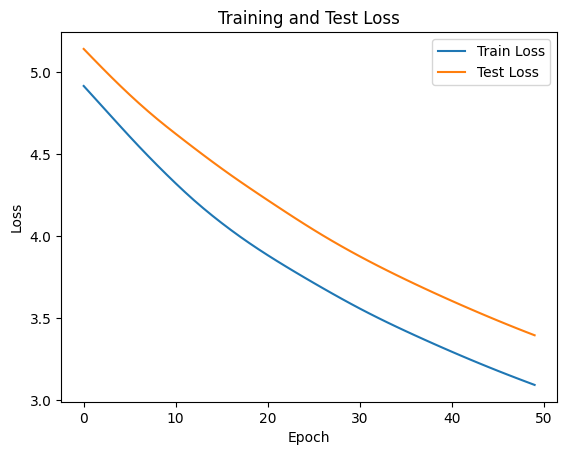

In [112]:
# 학습 결과 시각화
plt.plot(range(epochs), train_losses, label='Train Loss')
plt.plot(range(epochs), test_losses, label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Test Loss')
plt.legend()
plt.show()

In [ ]:
# 학습 결과 시각화
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Train Loss')
plt.plot(test_losses, label='Test Loss')


In [ ]:
### 기본 손실 함수 vs 커스텀 손실 함수
from sklearn.datasets import make_regression

# 데이터 생성
X, y = make_regression(
    n_samples=1000,
    n_features=10,
    n_targets=1,
    noise=50,
    random_state=42)

# 데이터 스케일링, 훈련 데이터와 테스트 데이터 분리
scaler_X = StandardScaler()
scaler_y = StandardScaler()
X = scaler_X.fit_transform(X)
y = scaler_y.fit_transform(y.reshape(-1, 1)).flatten()
print(X.shape, y.shape)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


(1000, 10) (1000,)


In [116]:
# 예측 함수
def predict(X, w, b):
    return np.dot(X, w) + b

# 손실 함수
def mse_loss(y_pred, y_true):
    return np.mean((y_true - y_pred) ** 2)

def my_loss(y_pred, y_true, w, lambda_reg=1.0):
    mse = mse_loss(y_pred, y_true)
    l2_reg = np.sum(w ** 2)
    return mse + (lambda_reg * l2_reg)

In [ ]:
def train_model(X_train, y_train, X_test, y_test, loss_fn, epochs=100, learning_rate=0.01, use_custom=False):
    
    np.random.seed(42)
    n_features = X_train.shape[1]
    W = np.random.randn(n_features)
    b = np.zeros(1).astype(np.float32)

    for epoch in range(epochs):
        y_pred_train = predict(X_train, W, b)
        y_pred_test = predict(X_test, W, b)

        train_loss = loss_fn(y_pred_train, y_train, W) if use_custom else loss_fn(y_pred_train, y_train)
        test_loss = loss_fn(y_pred_test, y_test, W) if use_custom else loss_fn(y_pred_test, y_test)

        d_loss = 2 * (y_pred_train - y_train) / X_train.shape[0]
        grad_w = np.dot(X_train.T, d_loss)
        grad_b = np.sum(d_loss)

        if use_custom:
            grad_w += 2 * 1.0 * W

        W -= learning_rate * grad_w
        b -= learning_rate * grad_b

        if (epoch + 1) % 10 == 0:
            print(f'Epoch {epoch+1}/{epochs}, Train Loss: {train_loss:.4f}, Test Loss: {test_loss:.4f}')

